In [1]:
using Pkg
Pkg.activate(".")
# Pkg.instantiate()
using YAXArrays
using Zarr
using Dates

  Activating project at `~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development`


In [2]:
include("./rainforest_lib.jl")
using .RainforestLib

In [3]:
lc = RainforestLib.get_lcc_datacube()


YAXArray with the following dimensions
lon                 Axis with 129600 Elements from -179.9986111111111 to 179.99861111111113
lat                 Axis with 64800 Elements from 89.99861111111113 to -89.99861111111112
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 86.03 GB


In [4]:
filtered_dc = RainforestLib.rough_spatial_filter(lc)


YAXArray with the following dimensions
lon                 Axis with 21600 Elements from -89.9986111111111 to -30.001388888888876
lat                 Axis with 16200 Elements from 14.99861111111112 to -29.99861111111111
time                Axis with 2 Elements from 2010-01-01T00:00:00 to 2011-01-01T00:00:00
name: lccs_class
Total size: 667.42 MB


In [5]:
local_dc = filtered_dc[:,:, 1]

# global_dc = lc[:,:, 1]

21600×16200 Matrix{UInt8}:
 0x28  0x28  0x28  0x6e  0x6e  0x64  …  0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x32  0x28  0x28  0x64  0x32  0x32     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x28  0x78  0x78  0x78  0x64  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x28  0x28  0x32  0x64  0x28  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x28  0x32  0x32  0x64  0x28  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x28  0x32  0x32  0x32  0x28  0x28  …  0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x28  0x64  0x64  0x28  0x78  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x32  0x32  0x32  0x28  0x78  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x32  0x64  0x32  0x28  0x78  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0x32  0x64  0x64  0x28  0x28  0x28     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
    ⋮                             ⋮  ⋱           ⋮                    
 0xd2  0xd2  0xd2  0xd2  0xd2  0xd2     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0xd2  0xd2  0xd2  0xd2  0xd2  0xd2     0xd2  0xd2  0xd2  0xd2  0xd2  0xd2
 0

In [6]:
bitmask = RainforestLib.build_bitmask_by_lccs_class(local_dc, Set(["tree_broadleaved_evergreen_closed_to_open"]))

21600×16200 Matrix{Float32}:
 NaN    NaN    NaN    NaN    NaN    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
   1.0  NaN    NaN    NaN      1.0     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    NaN    NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    NaN      1.0  NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN      1.0    1.0  NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN      1.0    1.0    1.0  NaN    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    NaN    NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
   1.0    1.0    1.0  NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
   1.0  NaN      1.0  NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
   1.0  NaN    NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
   ⋮                                ⋱              ⋮                 
 NaN    NaN    NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    NaN    NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    NaN    NaN    NaN

In [7]:
transposed_bitmask = bitmask'

16200×21600 adjoint(::Matrix{Float32}) with eltype Float32:
 NaN    1.0  NaN  NaN    NaN    NaN    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN      1.0    1.0     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN    1.0    1.0    1.0     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN      1.0     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    1.0  NaN  NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN    1.0  NaN  NaN    NaN    NaN    …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN      1.0     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
   ⋮                              ⋮    ⋱              ⋮                 
 NaN  NaN    NaN  NaN    NaN    NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN    NaN  NaN    NaN   

In [10]:
using Formatting
# Creating values for the base of visualisation

lon = YAXArrays.getAxis("lon", filtered_dc).values |> extrema 
lat = YAXArrays.getAxis("lat", filtered_dc).values |> extrema
lonrange = range(lon[1], lon[end], size(bitmask, 1))

# we need to flip the latitude because of an error in the datacube!!!!!
latrange = range(lat[1], lat[end], size(bitmask, 2))[end:-1:1]

printfmtln("Range of Longitude: {:f} {:f}", lon[1], lon[2])

printfmtln("Range of Latitude: {:f} {:f}", lat[1], lat[2])

printfmtln("Lonsize: {:d}; Latsize {:d}", length(lonrange), length(latrange))

Range of Longitude: -89.998611 -30.001389
Range of Latitude: -29.998611 14.998611
Lonsize: 21600; Latsize 16200


Checking the world map for forests in our filtered area (south america)

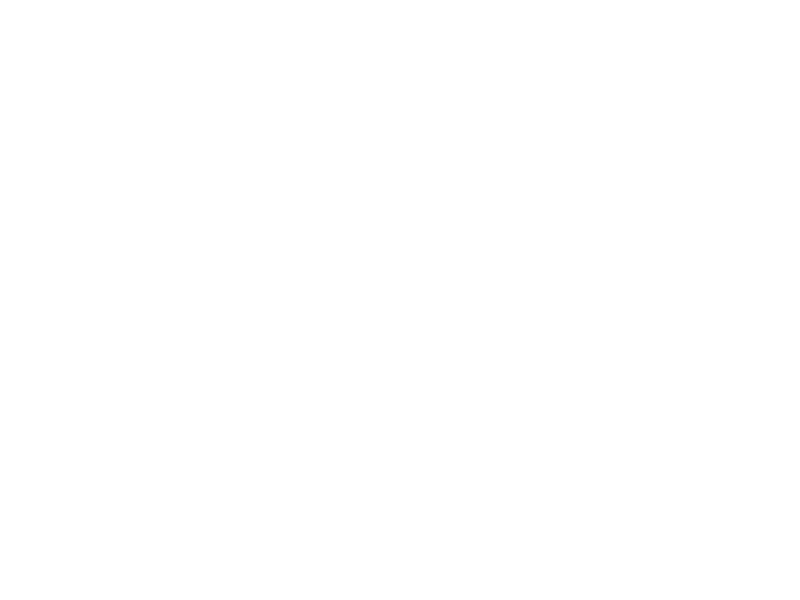

In [13]:
using GeoMakie, GLMakie, Formatting

fig = Figure()
dest = "+proj=lonlat"
ga = GeoMakie.GeoAxis(
    fig[1, 1]; # any cell of the figure's layout
    dest = dest,
    source = dest,
    coastlines = true # plot coastlines from Natural Earth, as a reference.
)

surface!(ga, lonrange, latrange, bitmask; shading = false, colormap = (:plasma, 0.45))

fig

In [8]:
using GeoMakie, GLMakie, Formatting






fig = Figure()
dest = "+proj=lonlat"
ga = GeoMakie.GeoAxis(
    fig[1, 1]; # any cell of the figure's layout
    dest = "+proj=ortho +lon_0=-60 +lat_0=-15",
    # source = dest,
    lonlims = automatic,
    latlims = automatic,
    coastlines = true # plot coastlines from Natural Earth, as a reference.
)

surface!(ga, lonrange, latrange, bitmask; shading = false, colormap = (:plasma, 0.45))

fig

Range of Longitude: -89.998611 -30.001389
Range of Latitude: -29.998611 14.998611
Lonsize: 21600; Latsize 16200
